In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
import math
import pickle

# Load your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

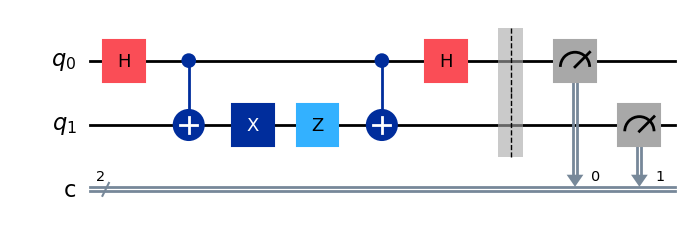

In [3]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(1)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])
qc.draw('mpl').savefig('superdense_circuit.jpg')
qc.draw('mpl')

## Run Superdensecoding circuit on simulated backend without noise

{'11': 1024}


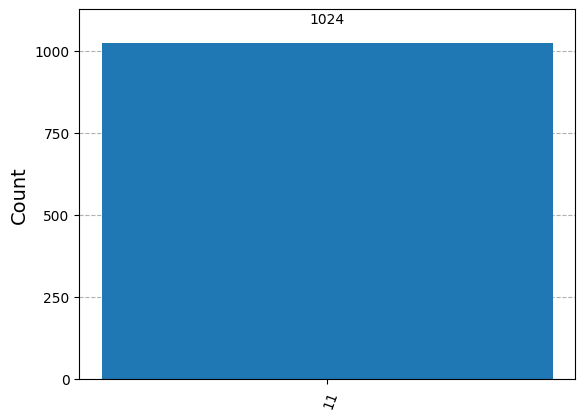

In [4]:
# Run on the qasm simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

# Print and plot results
print(counts)
plot_histogram(counts).savefig('superdense_ideal.jpg')
plot_histogram(counts)

## Run Superdensecoding circuit on simulated backend with noise model (locally)

{'11': 978, '01': 28, '00': 6, '10': 12}


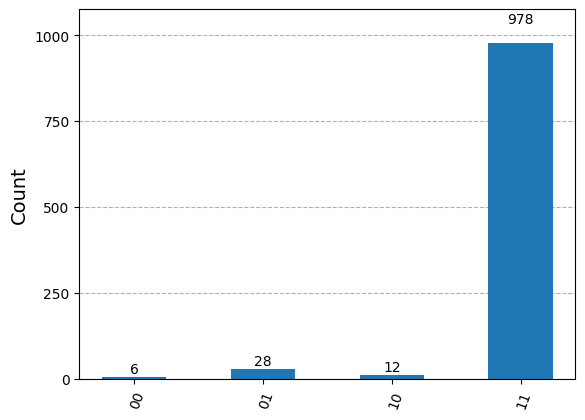

In [5]:
# Simulate a noisy backend, based on a cloud backend
backend = service.backend("ibm_sherbrooke")
sim_sherbrooke = AerSimulator.from_backend(backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_sherbrooke)

# Execute the circuit on the simulated noisy backend and plot results
result_noise = sim_sherbrooke.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
print(counts_noise)
plot_histogram(counts_noise).savefig('superdensecoding_noise_local.jpg')
plot_histogram(counts_noise)

## Run Supersense Coding circuit on actual quantum hardware

In [9]:
# Transpile the circuit for the selected backend
backend_name = "ibm_sherbrooke"
backend = service.backend(backend_name)  # Example using a simulator
transpiled_circuit = transpile(qc, backend)

# Define Sampler
sampler = Sampler(mode=backend)
 
# Run calculation
job = sampler.run([transpiled_circuit], shots=4096)

# Save the job ID
job_id = job.job_id()

print(f"Job (ID: {job_id}) sent successfully to backend {backend_name}.")
print("Come back after a few hours and retrieve the results with the cell below.")

Job (ID: cw6yfvzggr6g0087e3y0) sent successfully to backend ibm_sherbrooke.
Come back after a few hours and retrieve the results with the cell below.


### Retrieve job result from the cloud based on job ID

Results:
{'11': 3844, '01': 146, '10': 92, '00': 14}


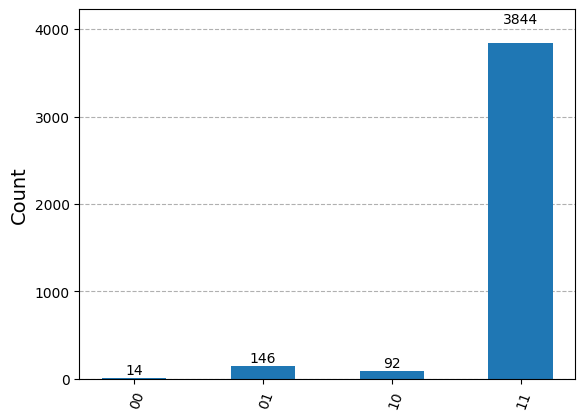

In [12]:
# Monitor the job status on IQP, and run this cell when the sent job has been completed

# Reload the service object, in case the nb starts up fresh
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")

# Retrieve the job result based on its ID
retrieved_job = service.job('cw6yfvzggr6g0087e3y0') # Put the job ID from the above cell here
job_result = retrieved_job.result()

# Print and plot results
print("Results:")
counts_cloud = job_result[0].data.c.get_counts()
print(counts_cloud)
plot_histogram(counts_cloud).savefig("superdensecoding_noise_sherbrooke.jpg")
plot_histogram(counts_cloud)